# Import Python modules

In [1]:
% matplotlib inline

In [2]:
import numpy as np
import scipy.stats  as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import time
from datetime import datetime, timedelta
from pathlib import Path

# Introduction

This notebook is to teach statistics...

## Random numbers

In [5]:
np.random.randint(0,10)     # Get a random integer in the specified range

6

In [6]:
np.random.choice([2,4,6,9]) # Get a random element from a sequence

2

In [7]:
np.random.random()          # Get a real number between 0 and 1

0.5014543042903545

In [8]:
np.random.uniform(0,10)     # Get a real in the specified range

7.123446202883078

## Probability distributions

https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [17]:
np.random.seed(122)   # Set the seed to an arbitrary value Set the 

print([np.random.uniform(0,10) for x in range(6)])

[1.569918378916666, 7.022100424924458, 2.614782663912485, 4.517129080114671, 4.080652648079488, 6.1154121111339945]


gaussian distribution with mean = 2.0, and a standard deviation of 1.0:

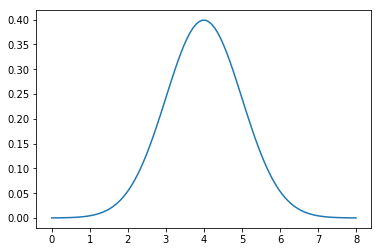

In [25]:
gaussian = stats.norm(loc=4.0, scale=1.0)
x = np.linspace(0.0, 8.0, 100)
y = gaussian.pdf(x)
plt.plot(x,y)

Cumulative distribution

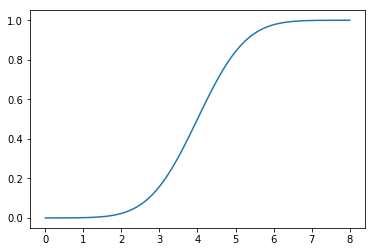

In [26]:
z = gaussian.cdf(x)
plt.plot(x,z)

For hypothesis testing, one often needs the p-value. For example, for the given gaussian distribution above, what would be the x-value so that P(X <= x) = 0.95?

In [27]:
gaussian.ppf(0.95)

5.644853626951472

/home/fdiblen/.pyenv/versions/3.6.5/envs/cdt-exeter/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


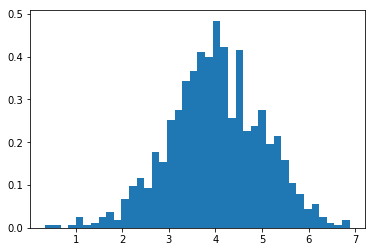

In [30]:
x = gaussian.rvs(1000);
plt.hist(x, bins=40, normed=True);

## Curve fitting

In [15]:
# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=100)
y_data = 3.4 * np.sin(2.5 * x_data) + np.random(size=100)

## And plot it
#plt.figure(figsize=(6, 4));
#plt.scatter(x_data, y_data);

TypeError: 'module' object is not callable

In [ ]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])
print(params);

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fit function')

plt.legend(loc='best')

plt.show()

In [ ]:
from scipy.stats import norm

# picking 500 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = norm.rvs(loc=0, scale=True, size=500) 

param = norm.fit(samp) # distribution fitting
# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution

# generate 100 numbers between -5 and 5
x = np.linspace(-5,5,100)

# fitted distribution
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])

# original distribution
pdf = norm.pdf(x)

plt.figure(figsize=(8, 6))
plt.title('Normal distribution')
plt.plot(x, pdf_fitted, 'r-', label='fitted distribution')
plt.plot(x, pdf, 'b-', label='original distribution')
plt.hist(samp, density=True, alpha=.3, label='sample')
plt.legend(loc='best', frameon=False)
plt.show()

# Exploring NetCDF data

In [ ]:
import netCDF4

## List available datasets

In [ ]:
!ls ../data/*.nc

# Read dataset

In [ ]:
input_directory = Path("../data")
input_file = input_directory / "pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc"
dataset = netCDF4.Dataset(input_file, "r")

# Get info about the dataset

## Define functions to get useful information

In [ ]:
def list_dataset_variables(datasetName):
    """Show description and units of variables in a NetCDF `DataSet`."""
    print("\n\nList of variables:\n")
    print(60*"-")
    for name, variable in datasetName.variables.items():            
        print("variable: {}".format(name))
        for attrname in variable.ncattrs():
            if (attrname == 'long_name'):
                print("    description: {}".format(getattr(variable, attrname)))
            if (attrname == 'units'):
                print("    units      : {}".format(getattr(variable, attrname)))
        print(60*"-")

                
def get_dataset_info(datasetName):
    """Show useful information about the NetCDF `DataSet`."""
    print("title       : ", datasetName.title)
    print("experiment  : ", datasetName.experiment)
    print("data_model  : ", datasetName.data_model)
    print("institution : ", datasetName.institution)
    print("contact     : ", datasetName.contact)
#     print("history     : ", datasetName.history)
#     print("references  : ", datasetName.references)
#     print("source      : ", datasetName.source)
#     print("dimensions  : ", datasetName.dimensions)
#     print("product     : ", datasetName.product)

    list_dataset_variables(datasetName)
    
    
def get_dates(data_set):
    """Obtain `datetime.datetime` objects from the `'time'` axis of a NetCDF `DataSet`."""
    return netCDF4.num2date(data_set['time'][:], data_set['time'].units)

In [ ]:
get_dataset_info(dataset)

# Discover the data

### Use **Precipitation** variable

``` python
pr   --> dataset['pr'][:]

lat  --> dataset['lat'][:]

lon  --> dataset['lon'][:]

time --> get_dates(dataset)
```

In [ ]:
print(time[0])

In [ ]:
print(time.shape)

In [ ]:
print(lat.shape)

In [ ]:
print(lon.shape)

In [ ]:
#sic.view()

In [ ]:
input_file

In [ ]:
# pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc
# 2005 December to 2030 November
print("Number of months: ", ((2030-2005))*12)
print (pr.shape, pr.size)

## Plot

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Find an interesting date

In [ ]:
time[178]

### Plot with **matplotlib**

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(pr[178,:,:]);

### Make it more interesting with **cartopy**

In [ ]:
transform=ccrs.RotatedPole(pole_longitude=180.0, pole_latitude=90)
projection=ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(
    dataset['lon'][:], dataset['lat'][:], dataset['pr'][178],
    transform=transform)

ax.coastlines()
fig.colorbar(pcm);

### Getting percentile values

In [ ]:
print(np.percentile(pr, 99))
print(pr.max())
print(np.percentile(pr, 1))
print(pr.min())

### Get a country data

In [ ]:
shpfilename = shpreader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

uk = None
for country in countries:
     if country.attributes['ADMIN'] == 'United Kingdom':
        uk = country
#print(uk)

### Highlight the country

In [ ]:
plt.figure(figsize=(20, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

pcm = ax.pcolormesh(
    dataset['lon'][:], dataset['lat'][:], dataset['pr'][178],
    transform=transform)

ax.add_geometries(uk.geometry, ccrs.PlateCarree(),
              facecolor='orange', edgecolor='0.5',
              label=uk.attributes['ADMIN'])

#ax.coastlines()

# ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)


ax.coastlines(zorder=1)
ax.gridlines(draw_labels=True)
ax.set_title('ax.gridlines(draw_labels=True)')


fig.colorbar(pcm);


# show only UK
#ax.set_extent([-10, 5, 45, 63], crs=ccrs.PlateCarree())
            
plt.show()

### Show only UK

In [ ]:
plt.figure(figsize=(20, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

pcm = ax.pcolormesh(
    dataset['lon'][:], dataset['lat'][:], dataset['pr'][178],
    transform=transform)

ax.add_geometries(uk.geometry, ccrs.PlateCarree(),
              facecolor='orange', edgecolor='0.5',
              label=uk.attributes['ADMIN'])

ax.coastlines()


fig.colorbar(pcm);

# show only UK
ax.set_extent([-10, 4, 48, 63], crs=ccrs.PlateCarree())


plt.show()

## Extreme cases

In [ ]:
indices = [pr > np.percentile(pr, 99.999)]
extreme = pr[indices]
# print(pr.shape)
print(extreme.shape)
# print(extreme)

## Change over the years

In [ ]:
fig = plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(get_dates(dataset)[:], pr[:, 50, 3])

plt.show()

print(dataset['lat'][50])
print(dataset['lon'][3])
print(dataset['time'][170:190])
print(get_dates(dataset)[170:190])

#### Exeter --> 50.7184° N, 3.5339° W

In [ ]:
# north_pole = np.unravel_index(np.argmax(dataset['lat'][:]), dataset['lat'].shape)
# pr_np = dataset['pr'][:, north_pole[0], north_pole[1]].data

# fig, ax = plt.subplots()
# ax.plot(get_dates(dataset)[178::180], pr_np[178::180])
# ax.set_xlabel('year')

In [ ]:
print(lat.shape)
print(lat.size)
print(lat.max())
print(lat.min())

# Save and close

In [ ]:
dataset.close()